In [1]:
# Importing libraries
from platform import python_version
print("Python Version",python_version())
import numpy as np
print("Numpy Version",np.__version__)
import pandas as pd
print("Pandas Version",pd.__version__)
import os
#from tqdm.notebook import tqdm
import tensorflow as tf
print("Tensorflow Version",tf.__version__)
from tensorflow import keras
print('keras version', tf.__version__)
import matplotlib.pyplot as plt
#%matplotlib inline
from functools import partial
from sklearn.metrics import accuracy_score,classification_report, precision_score, f1_score, recall_score
from pathlib import Path
from matplotlib.font_manager import FontProperties

Python Version 3.8.10
Numpy Version 1.24.3
Pandas Version 2.0.3
Tensorflow Version 2.13.0
keras version 2.13.0


In [2]:
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# This function will show the model's loss and accuracy plot.
def display_loss_accuracy_curves(model_history, model_name):
  """
  Return the loss and accuracy plot
  
  """

  train_loss = model_history.history['loss']
  val_loss = model_history.history['val_loss']

  train_acc = model_history.history['accuracy']
  val_acc = model_history.history['val_accuracy']

  epochs=range(len(model_history.history['loss']))

  # Plot loss curve
  plt.figure(figsize=(5,3))
  plt.plot(epochs , train_loss , label = "Training loss")
  plt.plot(epochs , val_loss , label = "Validation loss")
  plt.title(model_name + " Model Loss curve")
  plt.xlabel("No. of Epochs")
  plt.ylabel("Loss")
  plt.legend(loc='upper right')

  # Plot Accuracy curve
  plt.figure(figsize=(5,3))
  plt.plot(epochs , train_acc , label = "Training accuracy")
  plt.plot(epochs , val_acc , label = "Validation accuracy")
  plt.title(model_name + " Model Accuracy curve")
  plt.xlabel("No. of Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc='lower right')

In [4]:
# This function will provide a bar plot of the f1-score for each class.
def generate_f1_bar_plot(y_true,y_pred):
  '''
  Parameters
  ----------------------
  y_true : Actual class 
  y_pred : Predicted class

  Return
  ----------------------
  Display horizontal bar plot of f1-score of each class

  '''

  clf_report_dict = classification_report(y_true,y_pred , output_dict=True)  # Will return dictionary key as class name and value will again a dictionary having precision,recall
                                                                             # f1-score and support and here we intrested in f1-score
                                                                             # {'0': {'f1-score': 0.24056603773584903,
                                                                              #   'precision': 0.29310344827586204,
                                                                              #   'recall': 0.204,
                                                                              #   'support': 250},
                                                                              #  '1': {'f1-score': 0.5864406779661017,
                                                                              #   'precision': 0.5088235294117647,
                                                                              #   'recall': 0.692,
                                                                              #   'support': 250},......

  # Get f1-score of each class and store in dictionary key as class and values as f1-score
  f1_score={}
  for key , value in clf_report_dict.items():
    if key =='accuracy':
      break
    else:
      f1_score[hindi_character_[int(key)]] = value['f1-score']

  # Convert the f1-score dictionary into dataframe and sort the dataframe by f1-score
  f1_Score=pd.DataFrame(data={'class_names':list(f1_score.keys()),
                   'f1_score':list(f1_score.values())}).sort_values(by='f1_score',ascending=False)
  
  # Plot the horizontal bar plot for f1-score
  fig , ax = plt.subplots(figsize=(15,20))
  from pathlib import Path 
  from matplotlib.font_manager import FontProperties
    
  hindi_font = FontProperties(fname=Path('Nirmala.ttf'))
  f_score = ax.barh(range(len(f1_Score)),f1_Score['f1_score'].values)

  ax.set_yticks(range(len(f1_Score)))
  ax.set_yticklabels(f1_Score['class_names'],fontproperties=hindi_font,fontsize=15)
  ax.set_xlabel("f1-Score",fontsize=15)
  ax.set_ylabel("Class names",fontsize=15)
  ax.set_title("F1-Score for Model 1",fontsize=15)
  ax.invert_yaxis()

  # At the end of every bar show f1-score
  for f1 in f_score:
    width = f1.get_width()
    ax.text(1.03*width , f1.get_y() + f1.get_height()/1.5 , f"{width:.2f}" , ha='center' , va='bottom')

### Dataset Links 
https://archive.ics.uci.edu/dataset/389/devanagari+handwritten+character+dataset


https://www.kaggle.com/datasets/ashokpant/devanagari-character-dataset/code


In [5]:
# Directories path setting for training & validation data
train_dataset_path = "AksharDataset/Train"
test_dataset_path = "AksharDataset/Test"

In [6]:
#Training and testing datsets import from their respective directories
train_dataset = keras.preprocessing.image_dataset_from_directory(directory=train_dataset_path, image_size=(32,32), batch_size=32, label_mode='categorical')
test_dataset = keras.preprocessing.image_dataset_from_directory(directory=test_dataset_path, image_size=(32,32), batch_size=32, label_mode='categorical', shuffle=False)

Found 88526 files belonging to 58 classes.
Found 16386 files belonging to 58 classes.


In [7]:
print('Training Dataset Details :', train_dataset)
print('\n\nTesting Dataset Details :', test_dataset)
for images , labels in train_dataset.take(1):
    print('\n\nShape of an Image : ', images.shape)
    print('Shape of the Label : ', labels.shape)

Training Dataset Details : <_BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 58), dtype=tf.float32, name=None))>


Testing Dataset Details : <_BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 58), dtype=tf.float32, name=None))>


Shape of an Image :  (32, 32, 32, 3)
Shape of the Label :  (32, 58)


In [8]:
# The names of each character, in the correct order for the Hindi Devnagri script
class_names='''character_1_ka character_2_kha character_3_ga character_4_gha character_5_kna character_6_cha character_7_chha 
character_8_ja character_9_jha character_10_yna character_11_taamatar character_12_thaa character_13_daa character_14_dhaa 
character_15_adna character_16_tabala character_17_tha character_18_da character_19_dha character_20_na character_21_pa 
character_22_pha character_23_ba character_24_bha character_25_ma character_26_yaw character_27_ra character_28_la 
character_29_waw character_30_motosaw character_31_petchiryakha character_32_patalosaw character_33_ha character_34_chhya 
character_35_tra character_36_gya character_37_a character_38_aa character_39_i character_40_ee character_41_u character_42_oo 
character_43_ae character_44_ai character_45_o character_46_au character_47_an character_48_ah digit_0 digit_1 digit_2 
digit_3 digit_4 digit_5 digit_6 digit_7 digit_8 digit_9'''.split()

hindi_character = 'क ख ग घ ङ च छ ज झ ञ ट ठ ड ढ ण त थ द ध न प फ ब भ म य र ल व श ष स ह ॠ त्र ज्ञ अ आ इ ई उ ऊ ए ऐ ओ औ अं अः ० १ २ ३ ४ ५ ६ ७ ८ ९'.split()
class_names_=train_dataset.class_names 

In [9]:
hindi_character_=[]
for char in class_names_[:-10]:
  position = int(char.split("_")[1])
  hindi_character_.append(hindi_character[position-1])

hindi_character_.extend(hindi_character[-10:])
print(hindi_character_)

['ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'क', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'ख', 'श', 'ष', 'स', 'ह', 'ॠ', 'त्र', 'ज्ञ', 'अ', 'आ', 'इ', 'ग', 'ई', 'उ', 'ऊ', 'ए', 'ऐ', 'ओ', 'औ', 'अं', 'अः', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', '०', '१', '२', '३', '४', '५', '६', '७', '८', '९']


In [10]:
# This function will take one batch and display all of the images and labels that are associated with that batch.
def display_images_from_dataset(data , subplots = (8,4) , figsize = (8,16) , fontsize = 20):
  '''
  data : From where the images to be displayed
  subplot : No of plot to be displayed (Default : subplot = (8,4) )
  figsize : Size of figure (Default : (12,20) )
  fontsize : Size of text (Default : fontsize = 20 )
  ''' 
  
  hindi_font = FontProperties(fname=Path('Nirmala.ttf'))  # Helpful in displaying Hindi character in matplotlib

  plt.figure(figsize=figsize)
  for images , labels in data.take(1):
    for i in range(subplots[0]*subplots[1]):
      plt.subplot(subplots[0],subplots[1],i+1)
      plt.imshow(images[i].numpy().astype('uint8'))
      plt.title(hindi_character_[tf.argmax(labels[i]).numpy()],fontproperties=hindi_font,fontsize=fontsize)  # We are taking argmax of labels as labels are One-Hot encoded
      plt.axis(False)
  
  plt.show()

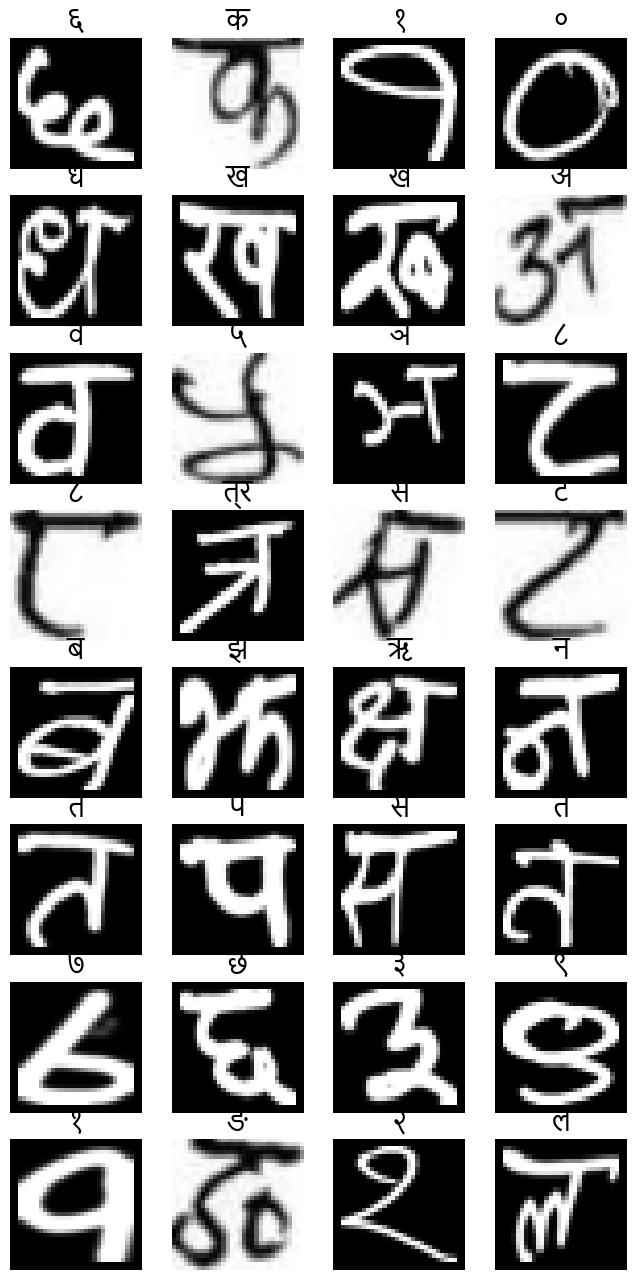

In [11]:
display_images_from_dataset(train_dataset)

In [12]:
# Data will be partitioned into training and validation sets by this function.
def train_validation_split(data,val_size=0.15):
    '''
    Parameters :
    -----------------------
    data : data to be split into train and validation
    val_size : Percentage of data to be in validation and rest in training (Default : 15 % data in validation and 85 % in training)

    Return :
    ----------------------
    Return train and validation dataset
    '''
    training_size = len(data)
    training_data = data.take(int((1-val_size)*training_size))   # 85 % data in training
    validation_data = data.skip(int((1-val_size)*training_size)) # 15 % data in validation
    return training_data , validation_data

# Spliting the training dataset into train and validation data
training_dataset , validation_dataset = train_validation_split(train_dataset)

To improve performance following strategies have been used

    --> Caching : The tf.data.Dataset.cache transformation can cache a dataset, either in memory or on local storage. This        will save some operations (like file opening and data reading) from being executed during each epoch.

    --> Prefetching : Prefetching overlaps the preprocessing and model execution of a training step. While the model is       executing training step s, the input pipeline is reading the data for step s+1. Doing so reduces the step time to the maximum of the training and the time it takes to extract the data.

In [13]:
training_dataset = training_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_data = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
testing_dataset = test_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

## Model using VGG Architecture

In [14]:
import datetime

# TensorBoard CallBack
log_dir = "Model_VGG/" + \
            datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# ModelCheckPoint CallBack
checkpoint_path = "Model_VGGCheckPoint_callback/" + \
                      "checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=True, monitor='val_accuracy')

# EarlyStopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4)

# ReduceLROnPlateau
reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor = 0.2, min_lr = 1e-7, patience=3)

In [15]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size= (3,3), strides =(1,1), activation='relu')

# Normalize the image array
rescale = tf.keras.Sequential([
    keras.layers.Rescaling(scale=1./255),
])

model_VGG = tf.keras.Sequential([
                    rescale,                  
                    # Layers 1 + Batchnormalization
                    DefaultConv2D(filters=32, input_shape=(32,32,3)),  # input shape (height, width, colour channels)
                    DefaultConv2D(filters=32),
                    keras.layers.BatchNormalization(),
                    keras.layers.MaxPool2D(pool_size=(2,2)),
                    # Layers 2 + Batchnormalization
                    DefaultConv2D(filters=64),
                    DefaultConv2D(filters=64),
                    DefaultConv2D(filters=64),
                    keras.layers.BatchNormalization(),
                    keras.layers.MaxPool2D(pool_size=(2,2)),
                    keras.layers.Flatten(),
                    # Fully connected layers 1 + Dropout
                    keras.layers.Dropout(0.1),
                    keras.layers.Dense(256, activation='relu'),
                    # Fully connected layers 2 + Dropout
                    keras.layers.Dropout(0.1),
                    keras.layers.Dense(len(class_names_),activation='softmax')  
])

In [16]:
# Compile the model
model_VGG.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [17]:
# Fit the model
model_VGG_history = model_VGG.fit(training_dataset, epochs = 50, steps_per_epoch = len(training_dataset), validation_data = validation_data, validation_steps = len(validation_data), callbacks=[tensorboard_callback,checkpoint_callback,early_stopping,reduce_lr_callback])

Epoch 1/50
2351/2351 [==============================] - 846s 314ms/step - loss: 0.5930 - accuracy: 0.8323 - val_loss: 0.3413 - val_accuracy: 0.8980 - lr: 0.0010
Epoch 2/50
2351/2351 [==============================] - 334s 142ms/step - loss: 0.1862 - accuracy: 0.9429 - val_loss: 0.1701 - val_accuracy: 0.9489 - lr: 0.0010
Epoch 3/50
2351/2351 [==============================] - 407s 173ms/step - loss: 0.1346 - accuracy: 0.9587 - val_loss: 0.1367 - val_accuracy: 0.9613 - lr: 0.0010
Epoch 4/50
2351/2351 [==============================] - 341s 145ms/step - loss: 0.1047 - accuracy: 0.9666 - val_loss: 0.1325 - val_accuracy: 0.9658 - lr: 0.0010
Epoch 5/50
2351/2351 [==============================] - 346s 147ms/step - loss: 0.0874 - accuracy: 0.9732 - val_loss: 0.1297 - val_accuracy: 0.9632 - lr: 0.0010
Epoch 6/50
2351/2351 [==============================] - 388s 165ms/step - loss: 0.0771 - accuracy: 0.9755 - val_loss: 0.1161 - val_accuracy: 0.9698 - lr: 0.0010
Epoch 7/50
2351/2351 [============

## model_VGG evaluation

In [18]:
model_VGG_results = model_VGG.evaluate(testing_dataset)
model_VGG_results

513/513 [==============================] - 65s 126ms/step - loss: 0.1247 - accuracy: 0.9826


[0.12472100555896759, 0.9826071262359619]

Achieved an accuracy of <b><i>98.49%</i></b> with this model, which is somewhat closer to the accuracy mentioned at dataset website i.e, <b><i>98.47%</i></b>
https://archive.ics.uci.edu/dataset/389/devanagari+handwritten+character+dataset


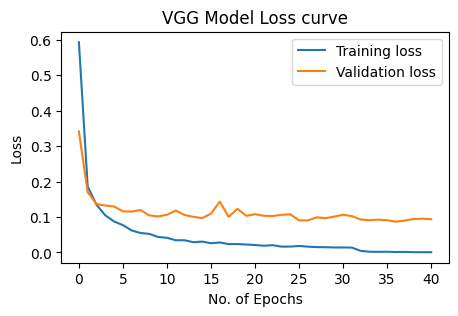

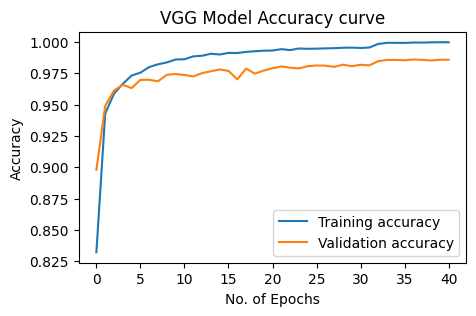

In [19]:
# Plot loss and accuracy curves
display_loss_accuracy_curves(model_VGG_history, 'VGG')

In [20]:
# Get the actual true label
y_true = []  
for images, labels in testing_dataset.unbatch(): # unbatch the test data and get images and labels
  y_true.append(labels.numpy().argmax())    # Here labels are one hot encoded argmax will return the index having the highest vale 
     
predicted_probability = model_VGG.predict(testing_dataset)
predicted_class = predicted_probability.argmax(axis=1)
accuracy_score(y_true,predicted_class)

513/513 [==============================] - 13s 23ms/step


0.9826071036250458

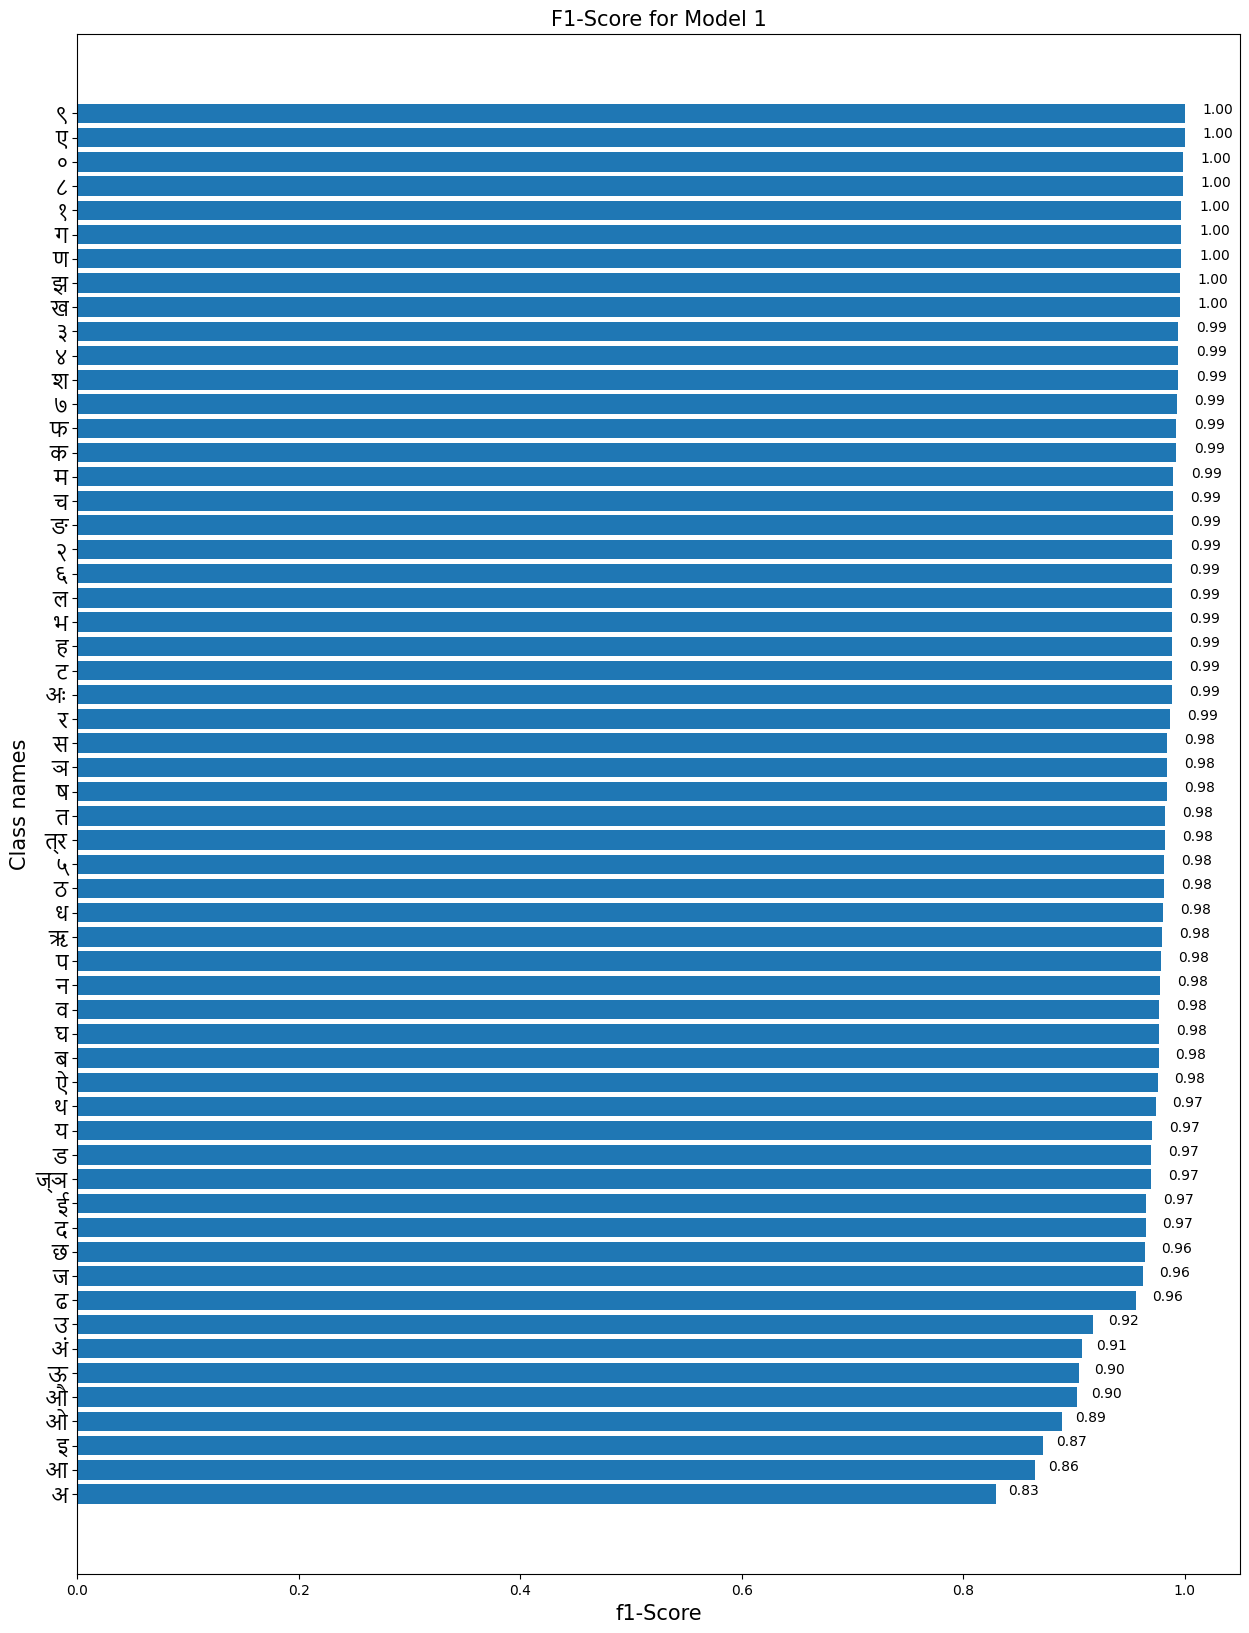

In [21]:
# Display f1-score of each class for model-1
generate_f1_bar_plot(y_true,predicted_class)

513/513 [==============================] - 12s 23ms/step
Found 16386 files belonging to 58 classes.
Out of 16386, we have only 281 images that did not match our predictions 
Among those 281 images some are shown below




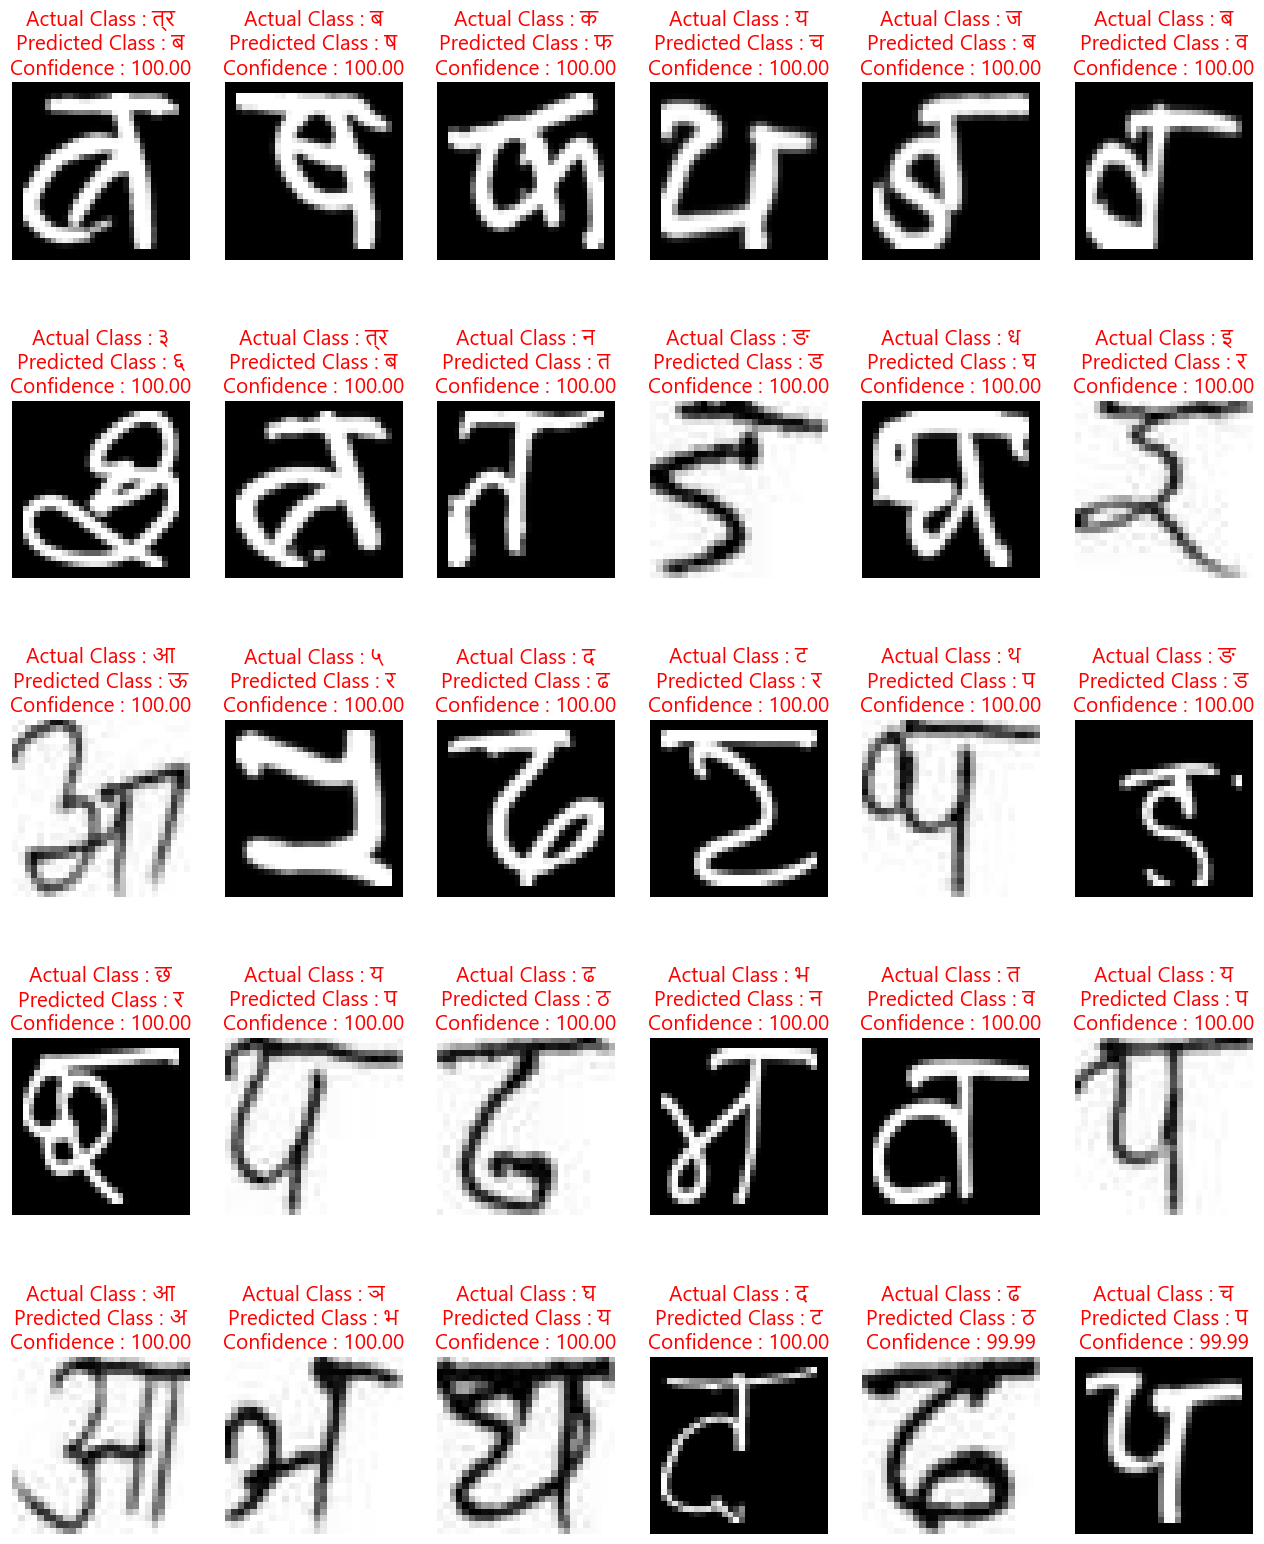

In [22]:
model_VGG.load_weights(checkpoint_path)
predicted_probability = model_VGG.predict(testing_dataset)
predicted_class = predicted_probability.argmax(axis=1)

# Lets view top 20 wrong prediction
def display_wrong_prediction(data , subplots = (5,4) , figsize = (10,10) , fontsize = 20):
  from pathlib import Path 
  from matplotlib.font_manager import FontProperties
  
  hindi_font = FontProperties(fname=Path('Nirmala.ttf')) 

  plt.figure(figsize=figsize)
  k=1
  for row in data.itertuples():

    plt.subplot(subplots[0],subplots[1],k)
    k=k+1
    img = tf.io.read_file(row[1])
    img = tf.io.decode_image(img)

    plt.imshow(tf.squeeze(img).numpy().astype('uint8'),cmap='gray')
    plt.title(f"Actual Class : {row[5]}\nPredicted Class : {row[6]}\nConfidence : {row[4]*100:.2f}",fontproperties=hindi_font,fontsize=fontsize,color='red')
    plt.axis(False)
  
  plt.show()


# Get the image path for all of our test data.
test_set = keras.preprocessing.image_dataset_from_directory(directory=test_dataset_path,
                                                image_size=(32,32),
                                                batch_size=32,
                                                label_mode='categorical',
                                                shuffle=False)

image_paths=[] # Store the image path

for img_path in test_set.list_files("AksharDataset/Test/*/*.*",shuffle=False):
  image_paths.append(img_path.numpy())

#image_paths[:10] # Display first 10 image path
df = pd.DataFrame(data={"image_paths":image_paths,
                        "y_true" : y_true,
                        "y_pred" : predicted_class,
                        "prediction_confidence":predicted_probability.max(axis=1),
                        "Actual_class":[hindi_character_[i] for i in y_true],
                        "Predicted_class" : [hindi_character_[i] for i in predicted_class]})

# Get dataframe having wrong predictions
wrong_df = df[df['y_true'] != df['y_pred']].sort_values(by='prediction_confidence',ascending=False)
print(f"Out of 16386, we have only {len(wrong_df)} images that did not match our predictions \nAmong those {len(wrong_df)} images some are shown below\n\n")

# Display wrong predicted images
display_wrong_prediction(data=wrong_df[:30],
                         subplots = (5,6),
                         figsize=(16,20),
                         fontsize=15)

In [64]:
# Lets view top 20 wrong prediction
def display_right_prediction(data , subplots = (5,4) , figsize = (10,10) , fontsize = 20):
  from pathlib import Path 
  from matplotlib.font_manager import FontProperties
  
  hindi_font = FontProperties(fname=Path('Nirmala.ttf')) 

  plt.figure(figsize=figsize)
  k=1

  for row in data.itertuples():

    plt.subplot(subplots[0],subplots[1],k)
    k=k+1
    img = tf.io.read_file(row[1])
    img = tf.io.decode_image(img)

    plt.imshow(tf.squeeze(img).numpy().astype('uint8'),cmap='gray')
    plt.title(f"Actual Class : {row[5]}\nPredicted Class : {row[6]}\nConfidence : {row[4]*100:.2f}",fontproperties=hindi_font,fontsize=fontsize,color='blue')
    plt.axis(False)
  
  plt.show()

In [23]:
model_VGG.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)       

In [24]:
# import tf.keras.utils
# from tensorflow.keras.utils import plot_model
# from keras.utils import plot
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# tf.keras.utils.plot_model(model_VGG, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [25]:
model_VGG.save("AksharSetModelVGG.h5")

c:\users\satna\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Model using ResNet

In [26]:
import datetime

# TensorBoard CallBack
log_dir = "ResNet_Batch_Drop_Model/"+\
            datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# ModelCheckPoint CallBack
checkpoint_path = "ResNet_Batch_Drop_ModelCheckPoint_callback/"+\
                      "checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=True, monitor='val_accuracy')
# EarlyStopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4)

# ReduceLROnPlateau
reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor = 0.2, min_lr = 1e-7, patience=3)

In [27]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size= (3,3), strides =(1,1), activation='relu')

rescale = tf.keras.Sequential([  # Data Normalization
  keras.layers.Rescaling(1./255),
])

input = keras.layers.Input(shape=(32,32,3))  # Input to the model
x = rescale(input)                     # Rescaling the input

# Layer 1 + BatchNormalization
x = DefaultConv2D(filters=32)(x)
x = DefaultConv2D(filters=64)(x)
x = keras.layers.BatchNormalization()(x)
output_1 = keras.layers.MaxPooling2D(pool_size=(2,2))(x)

# Layer 2 + BatchNormalization
x = DefaultConv2D(filters=64, padding='same')(output_1)
x = DefaultConv2D(filters=64, padding='same')(x)
x = keras.layers.BatchNormalization()(x)
# Skip Connection
output_2 = keras.layers.add([x,output_1])

# Layer 3 + BatchNormalization
x = DefaultConv2D(filters=64, padding='same')(output_2)
x = DefaultConv2D(filters=64, padding='same')(x)
x = keras.layers.BatchNormalization()(x)
# Skip Connection
output_3 = keras.layers.add([x,output_2])

x = DefaultConv2D(filters=64,)(output_3)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)

# Fully connected layer 1
output = keras.layers.Dense(len(class_names_) , activation='softmax')(x)

model_resnet = tf.keras.Model(input , output)

In [28]:
# Compile the model
model_resnet.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [29]:
len(validation_data), len(training_dataset) 

(416, 2351)

In [30]:
# Fit the model
model_resnet_history = model_resnet.fit(training_dataset,
                        epochs = 50 ,
                        steps_per_epoch = len(training_dataset) ,
                        validation_data = validation_data,
                        validation_steps = len(validation_data),
                        callbacks=[tensorboard_callback,checkpoint_callback,early_stopping,reduce_lr_callback])       
     

Epoch 1/50
2351/2351 [==============================] - 589s 249ms/step - loss: 0.8352 - accuracy: 0.7635 - val_loss: 0.2132 - val_accuracy: 0.9372 - lr: 0.0010
Epoch 2/50
2351/2351 [==============================] - 595s 253ms/step - loss: 0.2063 - accuracy: 0.9379 - val_loss: 0.1229 - val_accuracy: 0.9658 - lr: 0.0010
Epoch 3/50
2351/2351 [==============================] - 606s 258ms/step - loss: 0.1440 - accuracy: 0.9570 - val_loss: 0.1129 - val_accuracy: 0.9656 - lr: 0.0010
Epoch 4/50
2351/2351 [==============================] - 692s 294ms/step - loss: 0.1113 - accuracy: 0.9664 - val_loss: 0.1008 - val_accuracy: 0.9695 - lr: 0.0010
Epoch 5/50
2351/2351 [==============================] - 683s 290ms/step - loss: 0.0913 - accuracy: 0.9723 - val_loss: 0.0998 - val_accuracy: 0.9701 - lr: 0.0010
Epoch 6/50
2351/2351 [==============================] - 635s 270ms/step - loss: 0.0791 - accuracy: 0.9754 - val_loss: 0.0665 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 7/50
2351/2351 [============

In [31]:
model_resnet_results = model_resnet.evaluate(testing_dataset)
model_resnet_results

513/513 [==============================] - 30s 59ms/step - loss: 0.0475 - accuracy: 0.9897


[0.04747238755226135, 0.9896863102912903]

Eureka!!..We have achieved an accuracy of <b><i>98.97%</i></b> with this model,that is greater than by .5% mentioned at dataset website i.e, <b><i>98.47%</i></b> https://archive.ics.uci.edu/dataset/389/devanagari+handwritten+character+dataset
and better than accuracy of VGG model i.e., <b><i>98.26%</i></b>

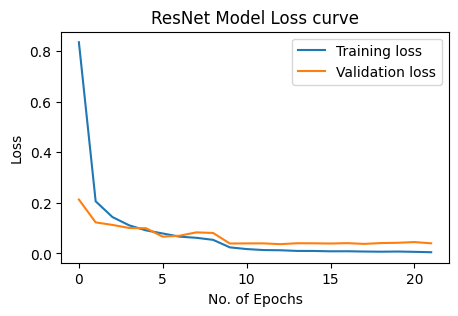

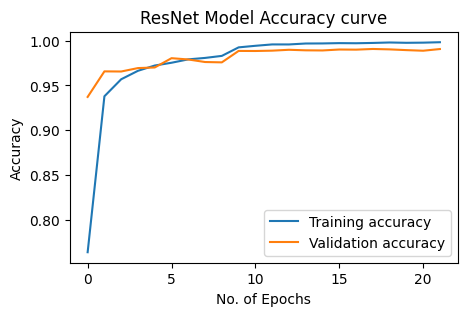

In [32]:
# Plot loss and accuracy curves
display_loss_accuracy_curves(model_resnet_history, 'ResNet')

513/513 [==============================] - 29s 55ms/step


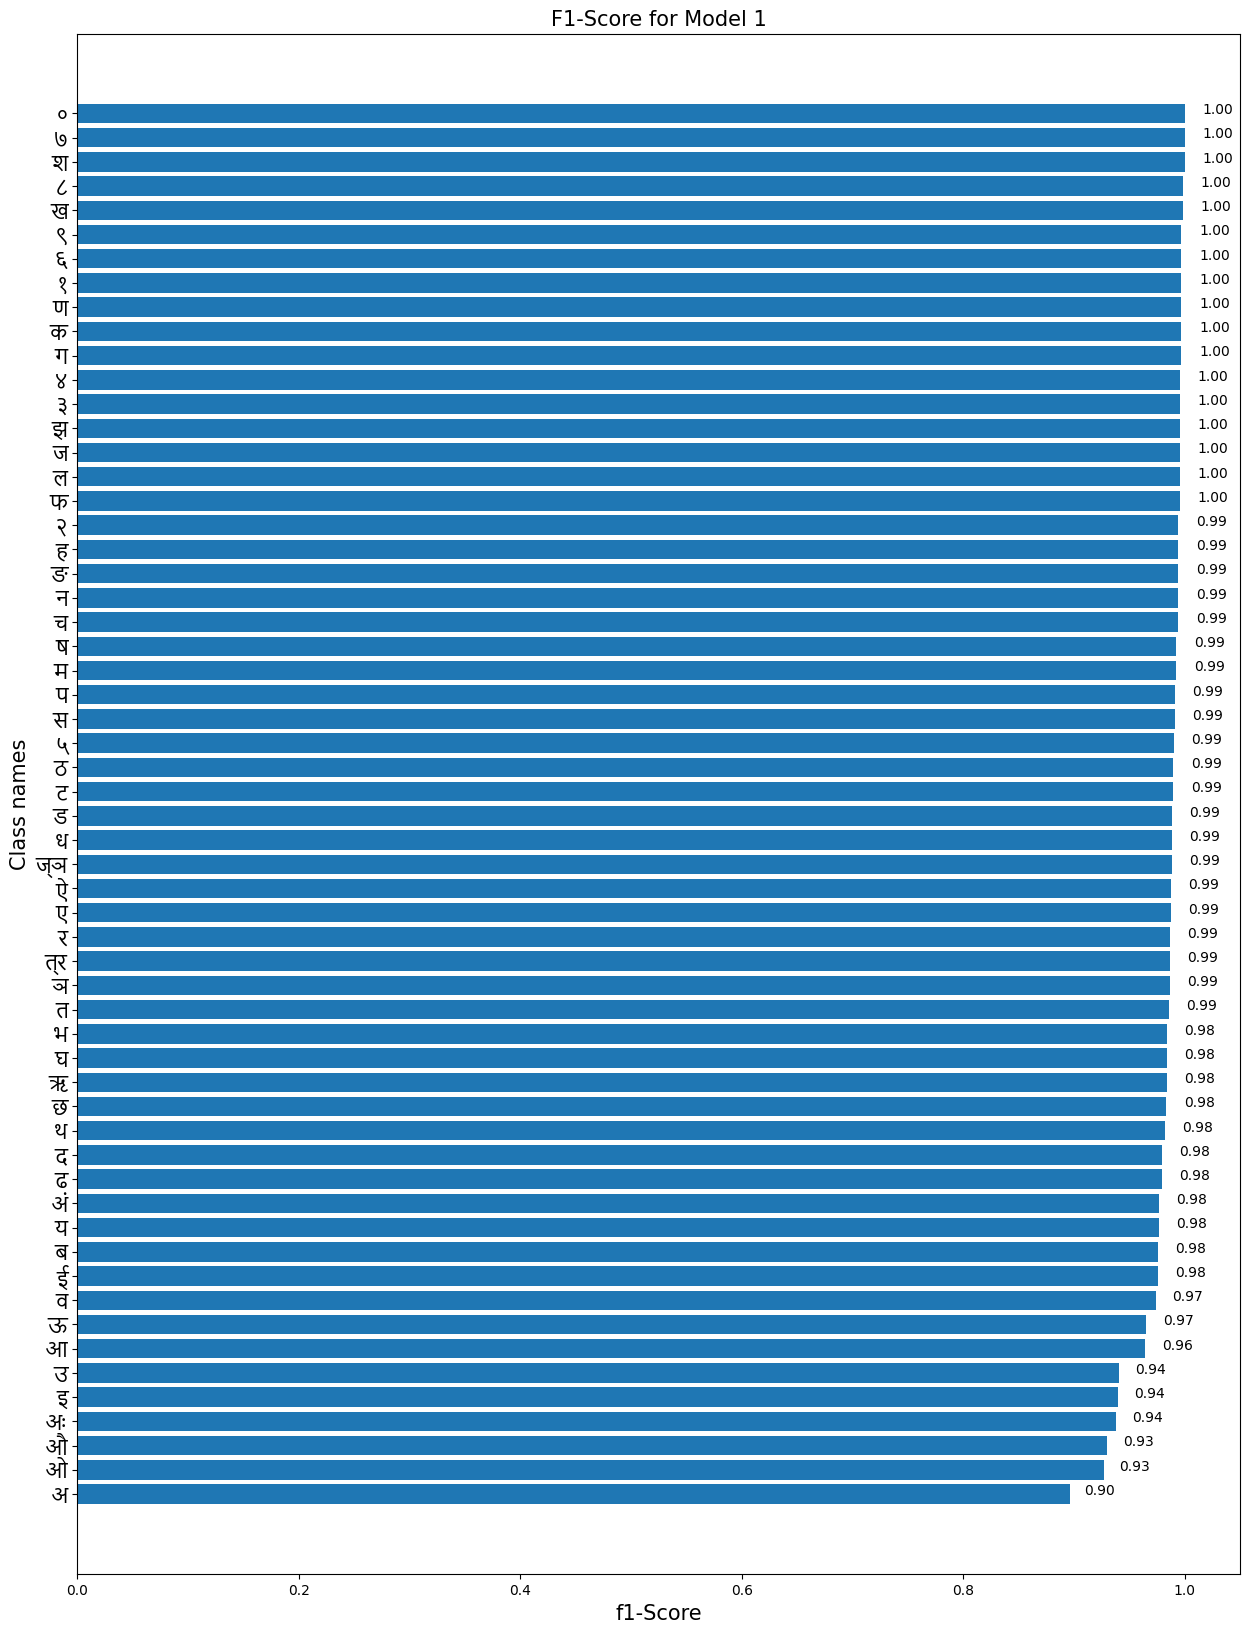

In [33]:
predicted_resnet_probability = model_resnet.predict(testing_dataset)
predicted_resnet_class = predicted_resnet_probability.argmax(axis=1)
accuracy_score(y_true,predicted_resnet_class)

# Display f1-score of each class for model-resnet
generate_f1_bar_plot(y_true,predicted_resnet_class)

In [34]:
print(accuracy_score(y_true,predicted_resnet_class))

0.989686317588185


Out of 16366, we have only 169 images that did not match our predictions 
Among those 169 images some are shown below




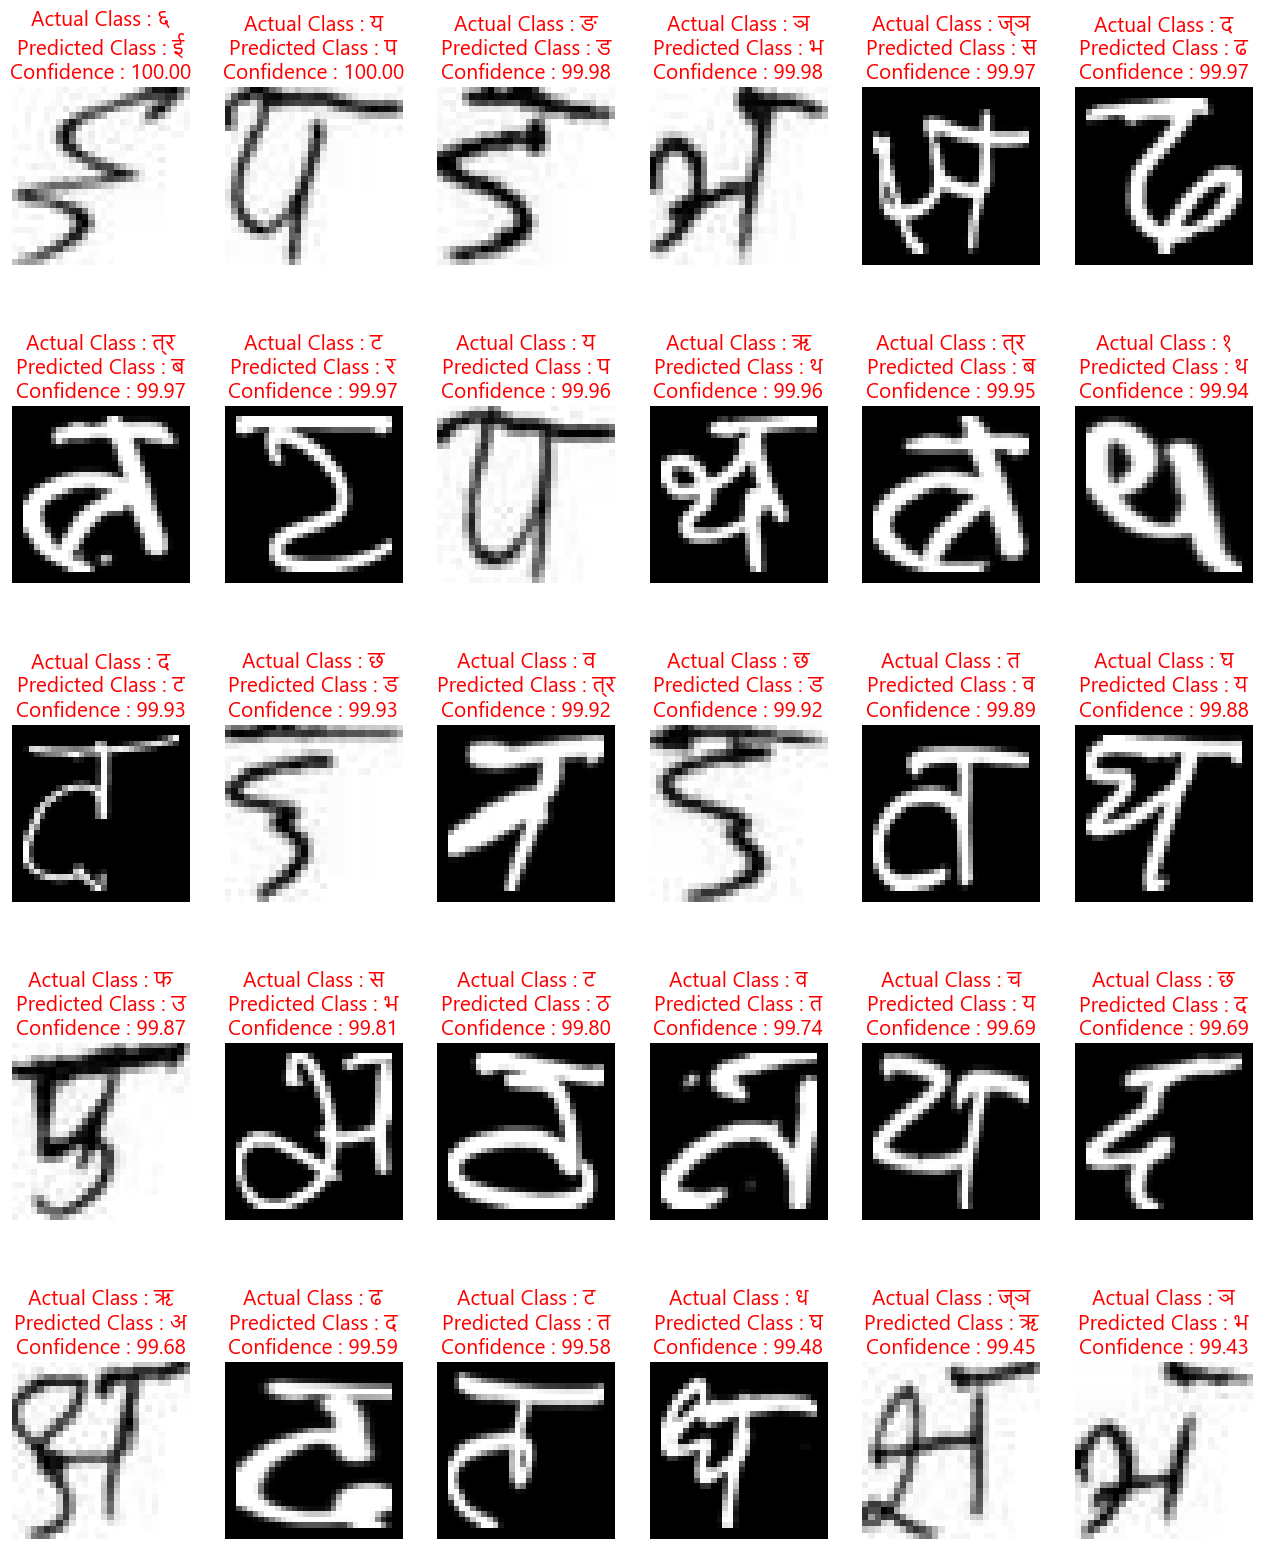

In [35]:
model_resnet.load_weights(checkpoint_path)
df_resnet = pd.DataFrame(data={"image_paths":image_paths,
                        "y_true" : y_true,
                        "y_pred" : predicted_resnet_class,
                        "prediction_confidence":predicted_resnet_probability.max(axis=1),
                        "Actual_class":[hindi_character_[i] for i in y_true],
                        "Predicted_class" : [hindi_character_[i] for i in predicted_resnet_class]})

# Get dataframe having wrong predictions
wrong_df_resnet = df_resnet[df_resnet['y_true'] != df_resnet['y_pred']].sort_values(by='prediction_confidence',ascending=False)
print(f"Out of 16366, we have only {len(wrong_df_resnet)} images that did not match our predictions \nAmong those {len(wrong_df_resnet)} images some are shown below\n\n")

# Display wrong predicted images
display_wrong_prediction(data=wrong_df_resnet[:30],
                         subplots = (5,6),
                         figsize=(16,20),
                         fontsize=15)

In [36]:
model_resnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 sequential_2 (Sequential)   (None, 32, 32, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv2d_5 (Conv2D)           (None, 30, 30, 32)           896       ['sequential_2[0][0]']        
                                                                                                  
 conv2d_6 (Conv2D)           (None, 28, 28, 64)           18496     ['conv2d_5[0][0]']            
                                                                                              

In [37]:
model_resnet.save("AksharSetModelResnet.h5")

c:\users\satna\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Out of 16386, we have 16217 images that exactly match our predictions 
Among those 169 images some are shown below




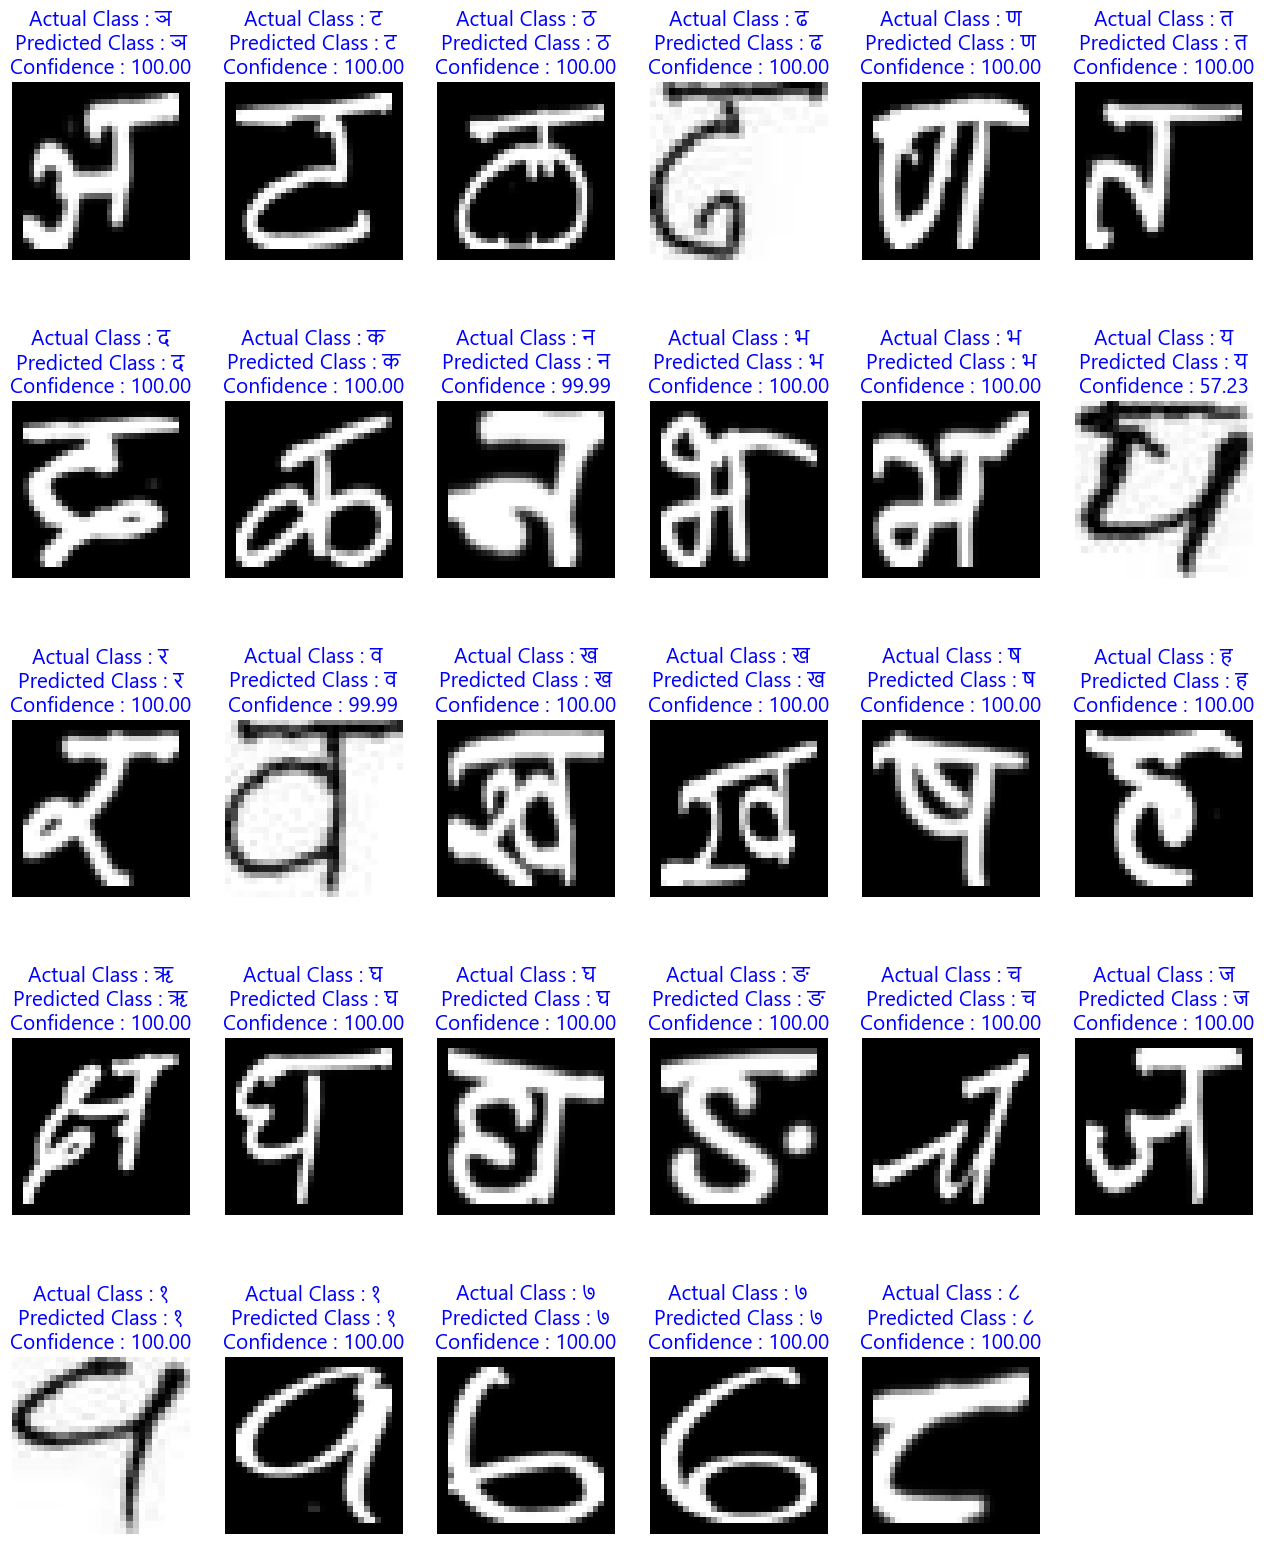

In [83]:
import random

index_pos = []
for i in range(29):
    pos = random.randint(0, 16200)
    index_pos.append(pos)
model_resnet.load_weights(checkpoint_path)
df_resnet = pd.DataFrame(data={"image_paths":image_paths,
                        "y_true" : y_true,
                        "y_pred" : predicted_resnet_class,
                        "prediction_confidence":predicted_resnet_probability.max(axis=1),
                        "Actual_class":[hindi_character_[i] for i in y_true],
                        "Predicted_class" : [hindi_character_[i] for i in predicted_resnet_class]})

# Get dataframe having wrong predictions
right_df_resnet = df_resnet[df_resnet['y_true'] == df_resnet['y_pred']]#.sort_values(by='prediction_confidence',ascending=False)
print(f"Out of 16386, we have {len(right_df_resnet)} images that exactly match our predictions \nAmong those {len(wrong_df_resnet)} images some are shown below\n\n")
#print(index_pos)
# Display wrong predicted images
display_right_prediction(data=right_df_resnet[right_df_resnet.index.isin(index_pos)],
                         subplots = (5,6),
                         figsize=(16,20),
                         fontsize=15)

In [79]:
right_df_resnet[right_df_resnet.index.isin([0,2,3])]#[right_df_resnet[9405, 10248, 10536, 15073, 4487, 3111, 11557, 15486, 8945, 5434, 3711, 4092, 11555, 14017, 1742, 7832, 15606, 7761, 3674, 1948, 11819, 6080, 14015, 20, 12025, 5281, 152, 7511, 14131]]

,image_paths,y_true,y_pred,prediction_confidence,Actual_class,Predicted_class
0,b'AksharDataset\\Test\\character_10_yna\\001_0...,0,0,1.000000,ञ,ञ
2,b'AksharDataset\\Test\\character_10_yna\\001_0...,0,0,0.998654,ञ,ञ
3,b'AksharDataset\\Test\\character_10_yna\\001_0...,0,0,1.000000,ञ,ञ
